In [1]:
import numpy as np 
import meep as mp 
import matplotlib.pyplot as plt
import meep.adjoint as mpa
import os
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
frel = np.load("fields_ref.npz")
feild = np.load("fields_struct.npz")
print("frel:",frel)
print("filed:",feild)



frel: NpzFile 'fields_ref.npz' with keys: Ey0, amplitude2_0, x, y, fcen...
filed: NpzFile 'fields_struct.npz' with keys: Ey, amplitude2, x, y, fcen...


In [3]:
intrel =frel["amplitude2_0"]
realint = feild["amplitude2"]
rel = realint/np.mean(intrel)
x = feild["x"]
y = feild["y"]


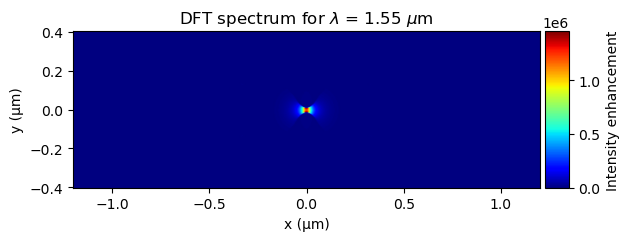

In [4]:
plt.title(r'DFT spectrum for $\lambda$ = 1.55 $\mu$m')
plt.pcolormesh(
    x,
    y,
    np.transpose(rel),
    cmap="jet",
    shading="gouraud",
    vmin=0,
    vmax=np.max(rel),
)
plt.gca().set_aspect("equal")
plt.xlabel("x (μm)")
plt.ylabel("y (μm)")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax, label='Intensity enhancement')
plt.tight_layout()
plt.savefig('rel.png',transparent = True)
plt.show()
plt.close()

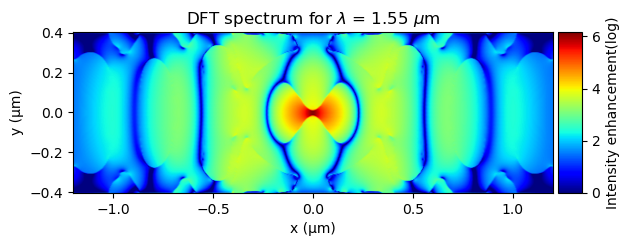

6.163053839053121


In [5]:
log =np.log10(rel) 
plt.title(r'DFT spectrum for $\lambda$ = 1.55 $\mu$m')
plt.pcolormesh(
    x,
    y,
    np.transpose(log),
    # log,
    cmap="jet",
    shading="gouraud",
    vmin=0,
    vmax=np.max(log),
)
plt.gca().set_aspect("equal")
plt.xlabel("x (μm)")
plt.ylabel("y (μm)")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax, label='Intensity enhancement(log)')
plt.tight_layout()
plt.savefig('rellog.png',transparent = True)
plt.show()
plt.close()
print(np.max(log))

Mode volume (in μm²): 0.014780264743080982


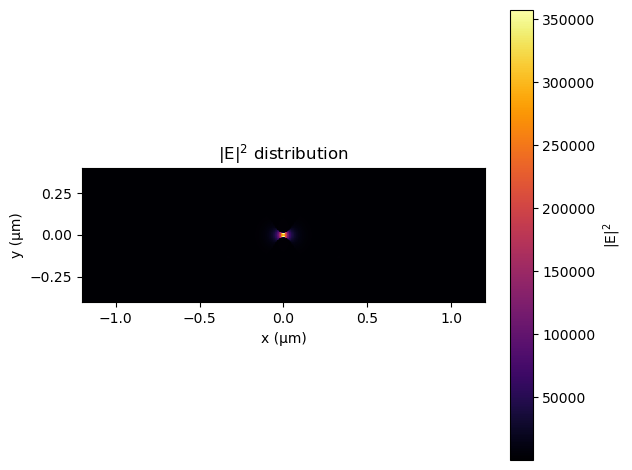

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


# === Check dimensions ===
assert realint.shape == (len(x), len(y)), "Shape mismatch! Expected (Nx, Ny)"

x = np.linspace(-1.2,1.2,realint.shape[0])
y = np.linspace(-0.4,0.4,realint.shape[1])
# === Define |E|² and |E|⁴ ===
E2 = realint                         # |E|²
E4 = np.power(realint, 2)           # |E|⁴ = (|E|²)²

# === Integrate to get mode volume ===
# axis 1 → y, axis 0 → x
int_E2 = integrate.simpson(integrate.simpson(E2, x=y, axis=1), x=x, axis=0)
int_E4 = integrate.simpson(integrate.simpson(E4, x=y, axis=1), x=x, axis=0)


V_mode = (int_E2 ** 2) / int_E4

print("Mode volume (in μm²):", V_mode)

# === Optional: visualize |E|² ===
plt.figure()
plt.title(r"|E|$^2$ distribution")
plt.pcolormesh(x, y, E2.T, shading="auto", cmap="inferno")
plt.gca().set_aspect("equal")
plt.xlabel("x (μm)")
plt.ylabel("y (μm)")
plt.colorbar(label=r"|E|$^2$")
plt.tight_layout()
plt.show()

In [7]:
wavelength = 1.55  # μm, or whatever your operating λ is
n = 1           # Refractive index of the material (e.g., Si)

lambda_eff = wavelength / n
V_norm = V_mode / (lambda_eff ** 2)

print(f"Mode volume V = {V_mode:.4f} μm²")
print(f"Normalized mode volume V_norm = {V_norm:.4f} (λ/n)^2 units")

Mode volume V = 0.0148 μm²
Normalized mode volume V_norm = 0.0062 (λ/n)^2 units


In [11]:
V1 = V_norm*0.1/1.55
print(f"Normalized mode volume V_norm = {V1:.8f} (λ/n)^3 units")

Normalized mode volume V_norm = 0.00039691 (λ/n)^3 units
